In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('new_india_onion.csv')

In [3]:
data= data.drop('Unnamed: 0',axis=1)

In [4]:
sns.set(rc={'figure.figsize':(11, 4)})

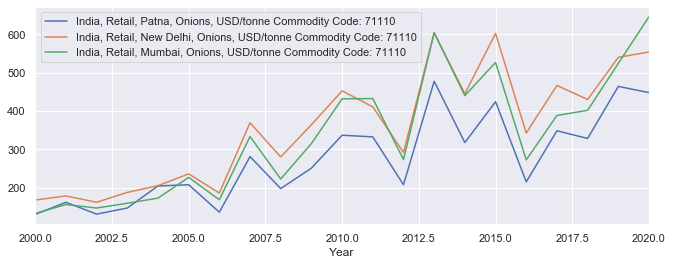

In [5]:
data.plot(x="Year", y=["India, Retail, Patna, Onions, USD/tonne Commodity Code: 71110", "India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110", "India, Retail, Mumbai, Onions, USD/tonne Commodity Code: 71110"], kind="line")

In [6]:
data2=pd.read_csv('new_india_onion_quantity.csv')

In [7]:
data_temp=data2[['Year','Value']]

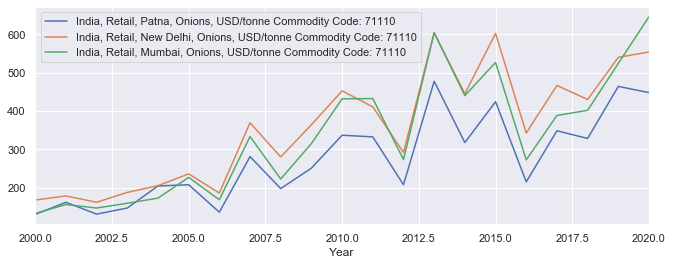

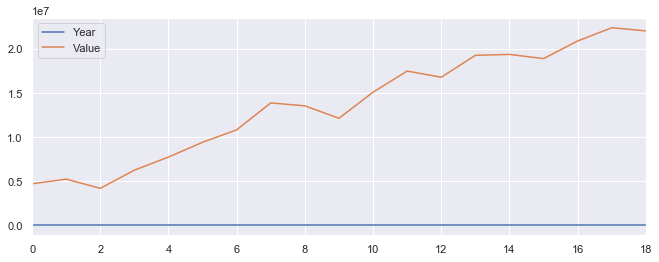

In [8]:
data.plot(x="Year", y=["India, Retail, Patna, Onions, USD/tonne Commodity Code: 71110", "India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110", "India, Retail, Mumbai, Onions, USD/tonne Commodity Code: 71110"], kind="line")
data_temp.plot(kind="line") 

In [9]:
data_new=data.merge(data_temp)

In [10]:
data_new

,Year,"India, Retail, Patna, Onions, USD/tonne Commodity Code: 71110","India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110","India, Retail, Mumbai, Onions, USD/tonne Commodity Code: 71110","India, Retail, Chennai, Onions, USD/tonne Commodity Code: 71110",Value
0,2000,130.000000,167.500000,132.500000,92.500000,4721100
1,2001,161.666667,178.333333,155.833333,121.666667,5252100
2,2002,130.833333,161.666667,146.666667,95.833333,4209500
3,2003,146.666667,187.500000,159.166667,175.833333,6267600
4,2004,204.166667,205.000000,172.500000,174.166667,7760600
5,2005,207.500000,235.833333,226.666667,200.833333,9432500
6,2006,135.833333,185.833333,168.333333,135.000000,10847000
7,2007,280.833333,369.166667,333.333333,285.833333,13900000
8,2008,197.500000,280.000000,222.500000,235.833333,13565000
9,2009,250.833333,364.166667,315.000000,326.666667,12158800


/Users/neelbhandari/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


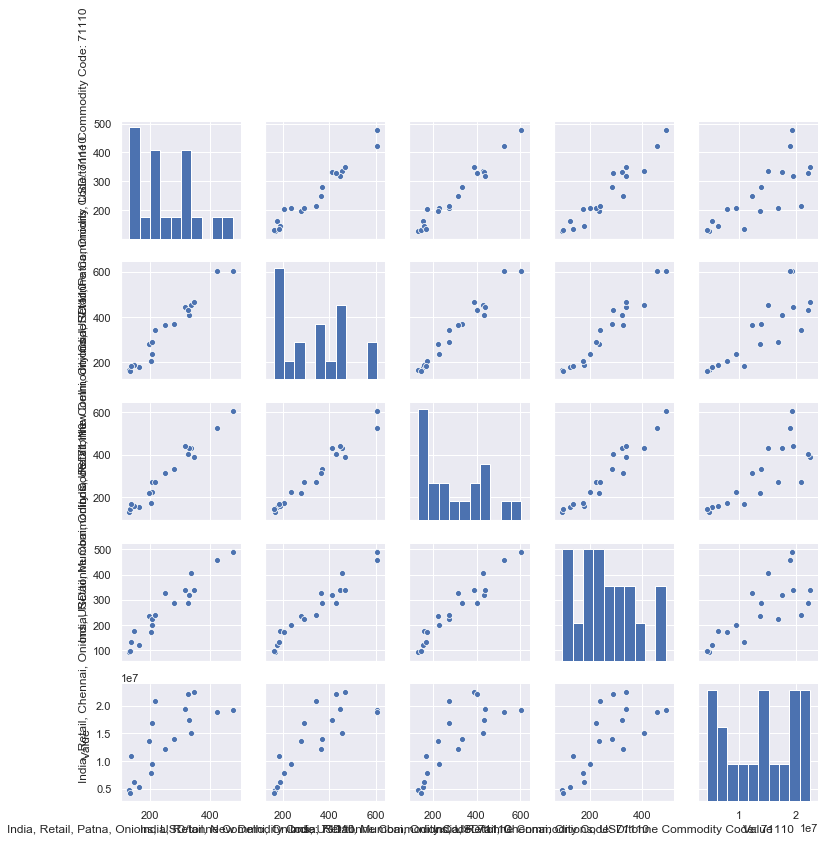

In [11]:
df= data_new[['India, Retail, Patna, Onions, USD/tonne Commodity Code: 71110','India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110','India, Retail, Mumbai, Onions, USD/tonne Commodity Code: 71110','India, Retail, Chennai, Onions, USD/tonne Commodity Code: 71110','Value']]
sns.pairplot(df, kind="scatter")
plt.show()

In [12]:
np.corrcoef(data_new['Value'], data_new['India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110'])

array([[1.        , 0.83047828],
       [0.83047828, 1.        ]])

In [13]:
cols=data_new.columns
for name in cols:
    print(np.corrcoef(data_new['Value'], data_new[name]))
    print(name)

[[1.         0.98321428]
 [0.98321428 1.        ]]
Year
[[1.         0.76804701]
 [0.76804701 1.        ]]
India, Retail, Patna, Onions, USD/tonne Commodity Code: 71110
[[1.         0.83047828]
 [0.83047828 1.        ]]
India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110
[[1.         0.79734555]
 [0.79734555 1.        ]]
India, Retail, Mumbai, Onions, USD/tonne Commodity Code: 71110
[[1.         0.75489962]
 [0.75489962 1.        ]]
India, Retail, Chennai, Onions, USD/tonne Commodity Code: 71110
[[1. 1.]
 [1. 1.]]
Value


### As you can see, New Delhi has the highest correlation coefficient with the Value change in production over the years

In [14]:
from scipy.stats import linregress
linregress(data_new['Value'], data_new['India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110'])

LinregressResult(slope=1.9209808248579662e-05, intercept=72.3425343442363, rvalue=0.830478279836591, pvalue=1.075049819645627e-05, stderr=3.1251096208110185e-06)

In [15]:
X_train= data_new[['Value','India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110']].iloc[0:17]

In [16]:
X_test= data_new[['Value','India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110']].iloc[17:19]

In [17]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)


array([[1.08946566, 0.68926554],
       [1.0681757 , 0.60640301]])

In [18]:
df=data_new[['Year','Value','India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110']].iloc[0:17]

In [19]:
df.rename(columns = {'India, Retail, New Delhi, Onions, USD/tonne Commodity Code: 71110':'Price'}, inplace = True)

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
ols_price = ols("np.log(Value) ~ np.log(Price)", data=df).fit()
print(ols_price.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Value)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     48.79
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           4.39e-06
Time:                        20:00:23   Log-Likelihood:               -0.68423
No. Observations:                  17   AIC:                             5.368
Df Residuals:                      15   BIC:                             7.035
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.2331      0.862     11.866

/Users/neelbhandari/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


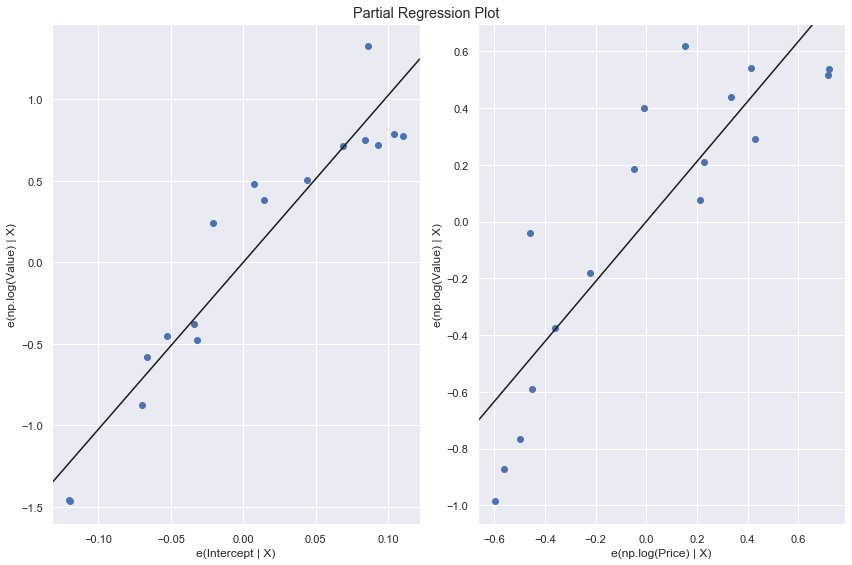

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(ols_price, fig=fig)

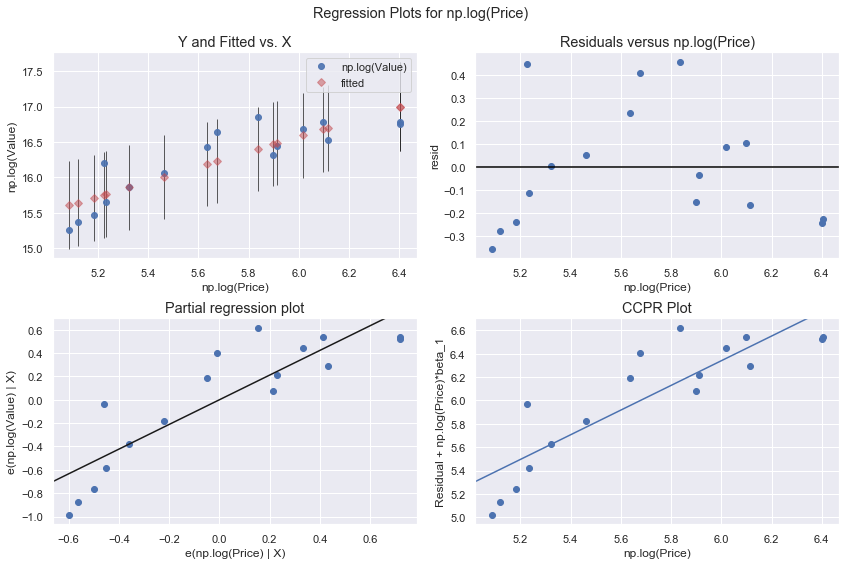

In [22]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ols_price, 'np.log(Price)', fig=fig)

In [23]:
df['Year'] = pd.to_datetime(df['Year'], format="%Y")


In [24]:
endog = df['Value']
exog = sm.add_constant(df['Price'])
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                   17
Model:                    RecursiveLS   Log Likelihood                -255.923
Date:                Fri, 10 Jul 2020   R-squared:                       0.687
Time:                        20:00:25   AIC                            515.847
Sample:                             0   BIC                            517.513
                                 - 17   HQIC                           516.012
Covariance Type:            nonrobust   Scale               10723966590865.756
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.207e+06   1.99e+06      1.106      0.269    -1.7e+06    6.12e+06
Price       3.257e+04   5671.356      5.742      0.000    2.15e+04    4.37e+04
Ljung-Box (Q):                         nan   Jarque-

/Users/neelbhandari/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


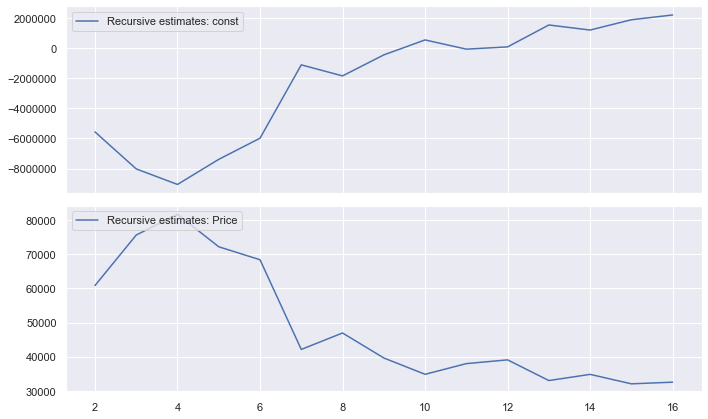

In [25]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

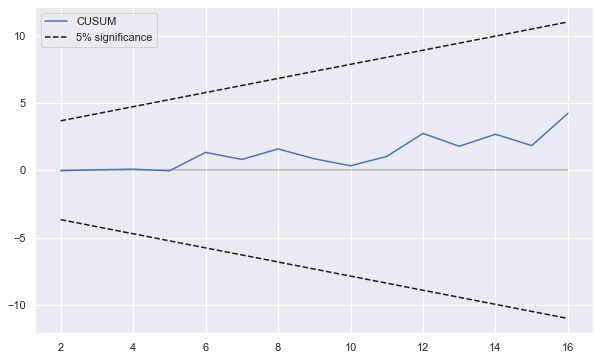

In [26]:
fig = res.plot_cusum(figsize=(10,6));

In [27]:
df

,Year,Value,Price
0,2000-01-01,4721100,167.500000
1,2001-01-01,5252100,178.333333
2,2002-01-01,4209500,161.666667
3,2003-01-01,6267600,187.500000
4,2004-01-01,7760600,205.000000
5,2005-01-01,9432500,235.833333
6,2006-01-01,10847000,185.833333
7,2007-01-01,13900000,369.166667
8,2008-01-01,13565000,280.000000
9,2009-01-01,12158800,364.166667


## Wheat Analysis For India

In [28]:
data1=pd.read_csv('new_india_wheat.csv')

In [29]:
data1.head()

,Unnamed: 0,Year,"India, Retail, New Delhi, Wheat, USD/tonne Commodity Code: 1001","India, Wholesale, New Delhi, Wheat, USD/tonne Commodity Code: 1001","India, Retail, Mumbai, Wheat, USD/tonne Commodity Code: 1001","India, Wholesale, Mumbai, Wheat, USD/tonne Commodity Code: 1001","India, Retail, Patna, Wheat, USD/tonne Commodity Code: 1001","India, Wholesale, Patna, Wheat, USD/tonne Commodity Code: 1001"
0,0,2000,165.833333,141.966667,230.000000,202.958333,172.500000,118.508333
1,0,2001,152.500000,131.041667,218.333333,197.025000,148.333333,135.600000
2,0,2002,149.166667,133.325000,229.166667,193.450000,155.000000,136.433333
3,0,2003,169.166667,151.758333,225.833333,199.408333,160.833333,144.375000
4,0,2004,187.500000,162.991667,231.666667,216.000000,151.666667,140.775000


<Figure size 2160x1440 with 0 Axes>

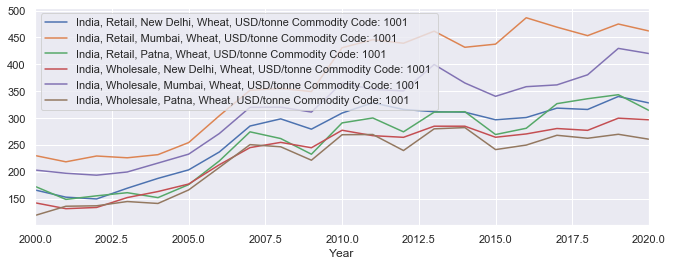

In [30]:
fig = plt.figure(figsize=(30,20))
data1.plot(y=["India, Retail, New Delhi, Wheat, USD/tonne Commodity Code: 1001 ", 
              "India, Retail, Mumbai, Wheat, USD/tonne Commodity Code: 1001 ", 
              "India, Retail, Patna, Wheat, USD/tonne Commodity Code: 1001 ",
              'India, Wholesale, New Delhi, Wheat, USD/tonne Commodity Code: 1001 ',
              'India, Wholesale, Mumbai, Wheat, USD/tonne Commodity Code: 1001 ','India, Wholesale, Patna, Wheat, USD/tonne Commodity Code: 1001 '],
           x='Year',
           kind="line")

In [31]:
data1.rename(columns = {'India, Retail, New Delhi, Wheat, USD/tonne Commodity Code: 1001 ':'Price1',
                        "India, Retail, Mumbai, Wheat, USD/tonne Commodity Code: 1001 ":'Price2',
                        "India, Retail, Patna, Wheat, USD/tonne Commodity Code: 1001 ":'Price3',
                        "India, Wholesale, New Delhi, Wheat, USD/tonne Commodity Code: 1001 ":'Whole1',
                       "India, Wholesale, Mumbai, Wheat, USD/tonne Commodity Code: 1001 ":'Whole2',
                       "India, Wholesale, Patna, Wheat, USD/tonne Commodity Code: 1001 ":'Whole3'}, inplace = True)

In [32]:
data1=data1.drop('Unnamed: 0',axis=1)

In [33]:
data1

,Year,Price1,Whole1,Price2,Whole2,Price3,Whole3
0,2000,165.833333,141.966667,230.000000,202.958333,172.500000,118.508333
1,2001,152.500000,131.041667,218.333333,197.025000,148.333333,135.600000
2,2002,149.166667,133.325000,229.166667,193.450000,155.000000,136.433333
3,2003,169.166667,151.758333,225.833333,199.408333,160.833333,144.375000
4,2004,187.500000,162.991667,231.666667,216.000000,151.666667,140.775000
5,2005,203.333333,176.958333,254.166667,232.608333,175.833333,165.950000
6,2006,236.666667,212.900000,304.166667,271.041667,220.000000,207.808333
7,2007,285.000000,244.800000,351.666667,319.866667,274.166667,250.341667
8,2008,298.333333,254.550000,355.000000,320.166667,261.666667,246.308333
9,2009,279.166667,244.533333,349.166667,310.966667,232.500000,221.341667


In [34]:
quantity1=pd.read_csv('new_india_wheat_quantity.csv')

In [35]:
quantity1

,Unnamed: 0,Area,Item Code,Item,Year,Unit,Value
0,38,India,15,Wheat,2000,tonnes,76368896
1,39,India,15,Wheat,2001,tonnes,69680896
2,40,India,15,Wheat,2002,tonnes,72766304
3,41,India,15,Wheat,2003,tonnes,65760800
4,42,India,15,Wheat,2004,tonnes,72156200
5,43,India,15,Wheat,2005,tonnes,68636896
6,44,India,15,Wheat,2006,tonnes,69354496
7,45,India,15,Wheat,2007,tonnes,75806704
8,46,India,15,Wheat,2008,tonnes,78570200
9,47,India,15,Wheat,2009,tonnes,80679400


In [36]:
data_temp1=quantity1[['Year','Value']]
data_new_wheat=data1.merge(data_temp1)

In [37]:
data_new_wheat.corr()

,Year,Price1,Whole1,Price2,Whole2,Price3,Whole3,Value
Year,1.000000,0.886399,0.908232,0.947065,0.912873,0.908883,0.869535,0.901926
Price1,0.886399,1.000000,0.990612,0.952618,0.977088,0.958172,0.974773,0.806443
Whole1,0.908232,0.990612,1.000000,0.960596,0.988073,0.964398,0.983847,0.815215
Price2,0.947065,0.952618,0.960596,1.000000,0.974240,0.955479,0.938136,0.893252
Whole2,0.912873,0.977088,0.988073,0.974240,1.000000,0.974964,0.976721,0.855250
Price3,0.908883,0.958172,0.964398,0.955479,0.974964,1.000000,0.967018,0.871109
Whole3,0.869535,0.974773,0.983847,0.938136,0.976721,0.967018,1.000000,0.773677
Value,0.901926,0.806443,0.815215,0.893252,0.855250,0.871109,0.773677,1.000000


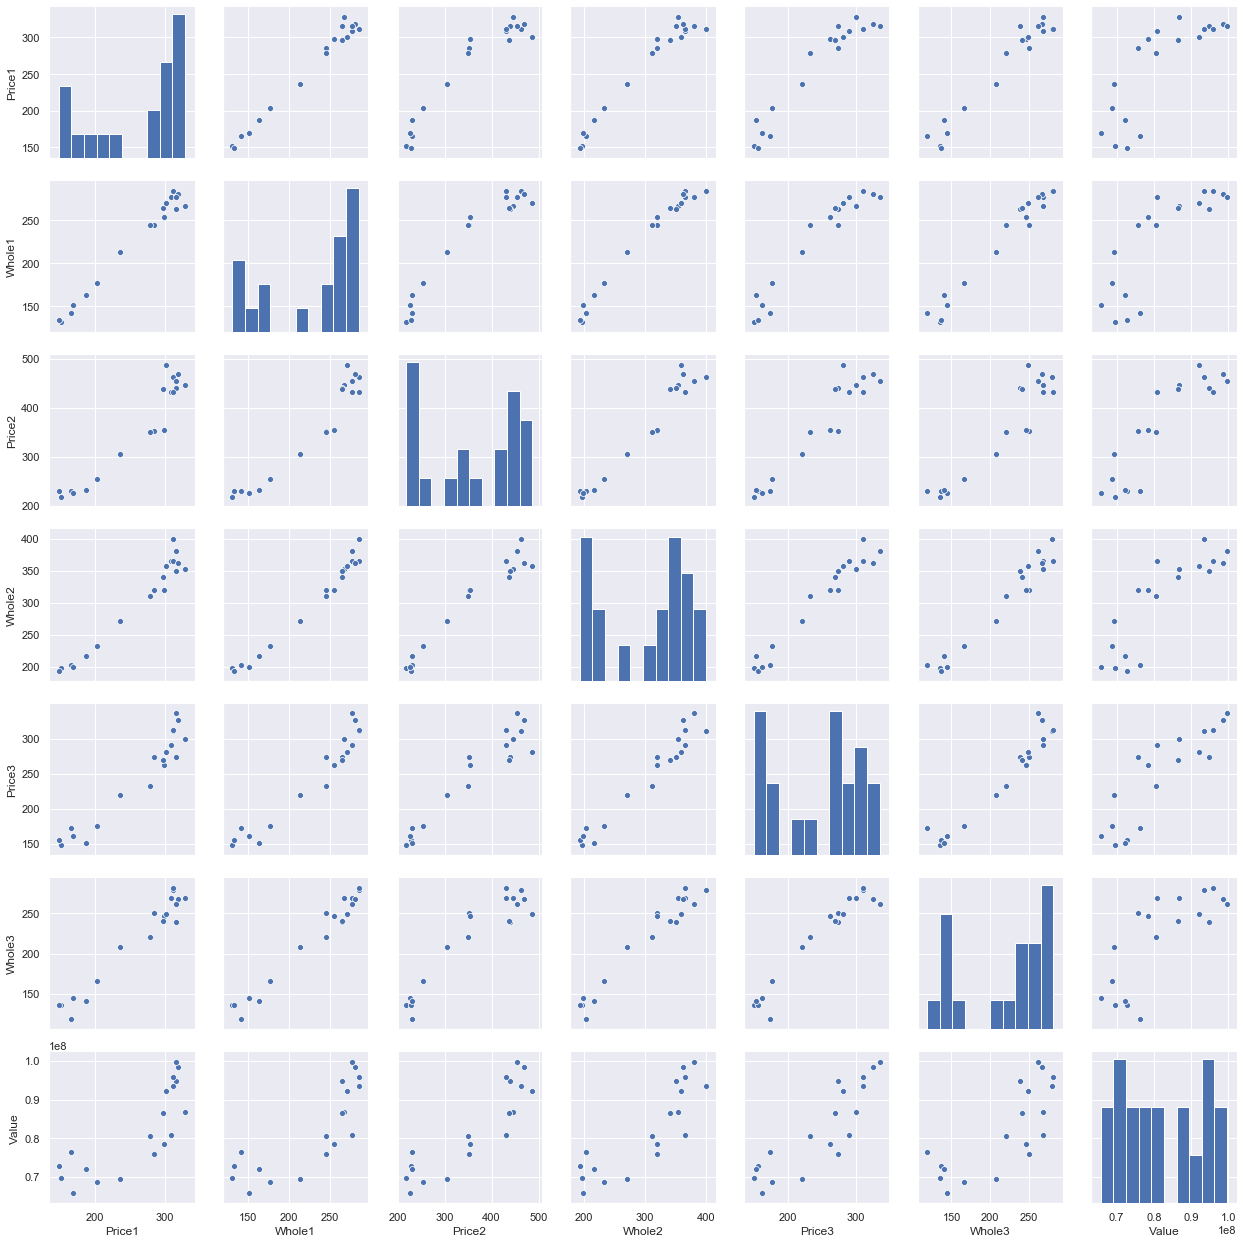

In [38]:
sns.pairplot(data_new_wheat.drop('Year',axis=1),kind='scatter')

In [39]:
cols=data_new_wheat.columns
for name in cols:
    print(np.corrcoef(data_new_wheat['Value'], data_new_wheat[name]))
    print(name)

[[1.         0.90192552]
 [0.90192552 1.        ]]
Year
[[1.         0.80644286]
 [0.80644286 1.        ]]
Price1
[[1.         0.81521469]
 [0.81521469 1.        ]]
Whole1
[[1.        0.8932517]
 [0.8932517 1.       ]]
Price2
[[1.         0.85525007]
 [0.85525007 1.        ]]
Whole2
[[1.         0.87110854]
 [0.87110854 1.        ]]
Price3
[[1.         0.77367747]
 [0.77367747 1.        ]]
Whole3
[[1. 1.]
 [1. 1.]]
Value


In [40]:
from scipy.stats import linregress
linregress(np.log(data_new_wheat['Value']), np.log(data_new_wheat['Whole3']))

LinregressResult(slope=1.647137078858219, intercept=-24.658476135982337, rvalue=0.7545529483879578, pvalue=0.0001891182815429246, stderr=0.34743831633387595)

In [41]:
df=data_new_wheat[['Year','Value','Price2']]
ols_price = ols("np.log(Value) ~ np.log(Price2)", data=df).fit()
print(ols_price.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Value)   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     59.50
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           5.97e-07
Time:                        20:00:44   Log-Likelihood:                 25.756
No. Observations:                  19   AIC:                            -47.51
Df Residuals:                      17   BIC:                            -45.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.8955      0.301     52.

/Users/neelbhandari/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


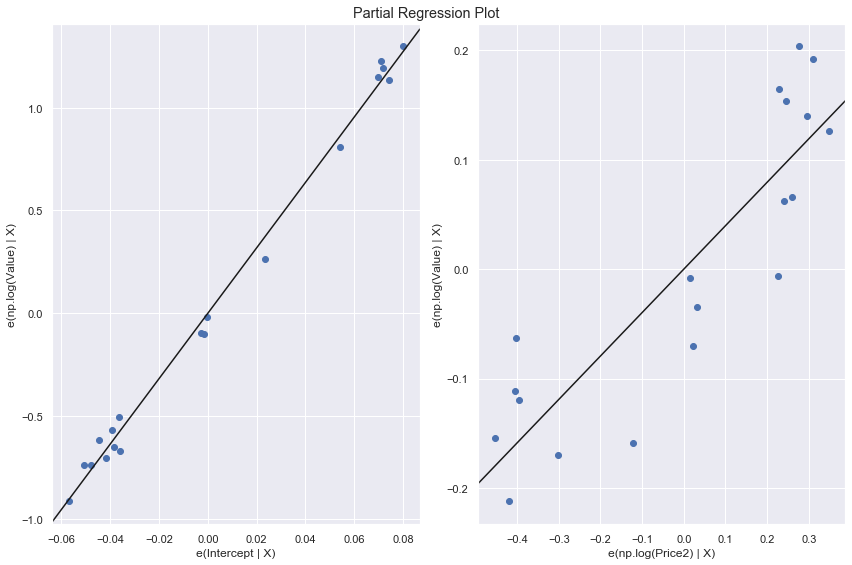

In [42]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(ols_price, fig=fig)

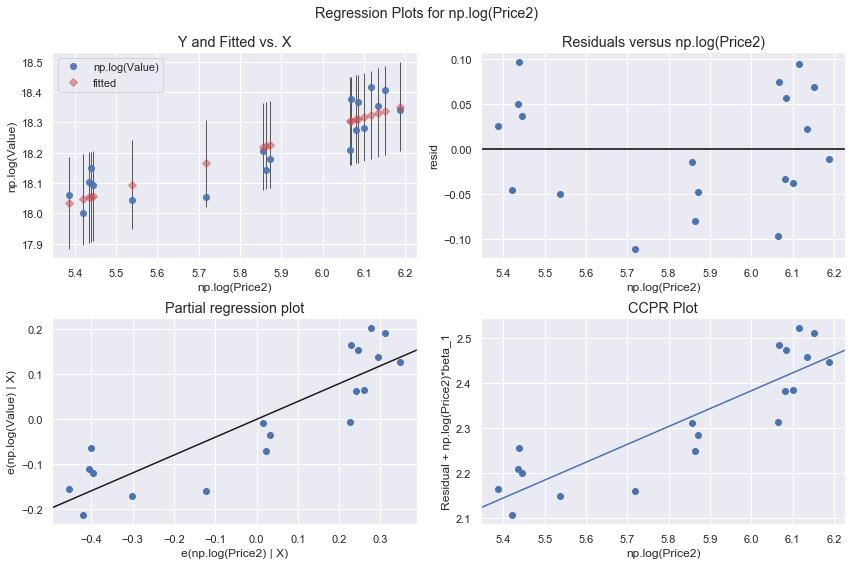

In [43]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ols_price, 'np.log(Price2)', fig=fig)

In [44]:
df['Year'] = pd.to_datetime(df['Year'], format="%Y")
endog = np.log(df['Value'])
exog = sm.add_constant(np.log(df['Price2']))
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                   19
Model:                    RecursiveLS   Log Likelihood                  18.541
Date:                Fri, 10 Jul 2020   R-squared:                       0.778
Time:                        20:01:01   AIC                            -33.083
Sample:                             0   BIC                            -31.194
                                 - 19   HQIC                           -32.763
Covariance Type:            nonrobust   Scale                            0.004
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.8955      0.301     52.818      0.000      15.306      16.485
Price2         0.3970      0.051      7.714      0.000       0.296       0.498
Ljung-Box (Q):                         nan   Jarque-

/Users/neelbhandari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


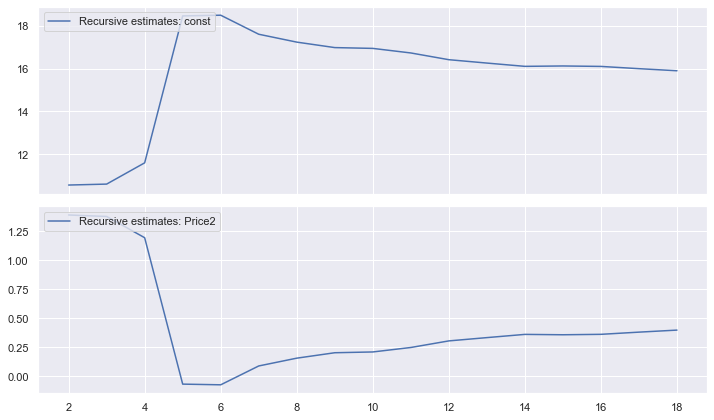

In [47]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));


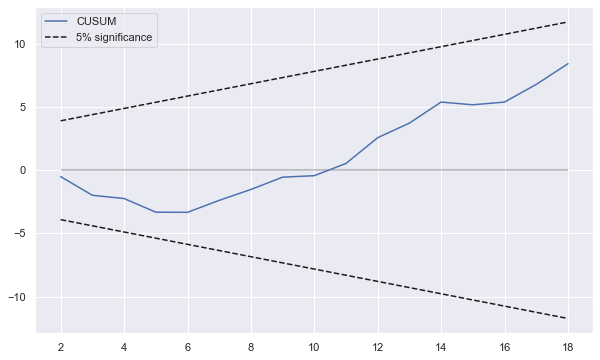

In [48]:
fig = res.plot_cusum(figsize=(10,6));

### Wheat and Price have a price elasticity of supply = 0.3970

## Rice Visualisation

In [49]:
data2=pd.read_csv('new_india_rice.csv')

In [50]:
data2.head()

,Unnamed: 0,Year,"India, Retail, Chennai, Rice, USD/tonne Commodity Code: 1006","India, Wholesale, Chennai, Rice, USD/tonne Commodity Code: 1006","India, Retail, Mumbai, Rice, USD/tonne Commodity Code: 1006","India, Wholesale, Mumbai, Rice, USD/tonne Commodity Code: 1006","India, Retail, New Delhi, Rice, USD/tonne Commodity Code: 1006","India, Wholesale, New Delhi, Rice, USD/tonne Commodity Code: 1006"
0,0,2000,255.000000,221.475000,283.333333,252.191667,285.000000,223.000000
1,0,2001,229.166667,202.608333,252.500000,227.850000,255.000000,198.825000
2,0,2002,218.333333,200.616667,244.166667,209.125000,249.166667,190.250000
3,0,2003,241.666667,227.616667,238.333333,197.808333,254.166667,201.666667
4,0,2004,245.833333,232.691667,244.166667,210.733333,278.333333,236.175000


<Figure size 2160x1440 with 0 Axes>

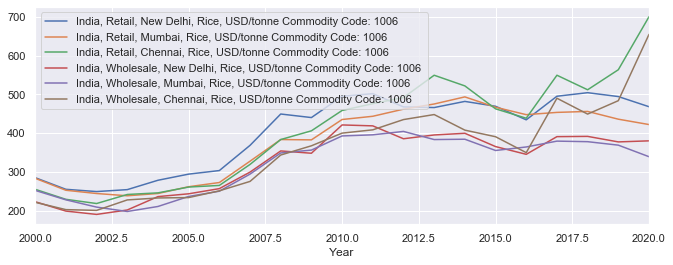

In [51]:
fig = plt.figure(figsize=(30,20))
data2.plot(y=["India, Retail, New Delhi, Rice, USD/tonne Commodity Code: 1006 ", 
              "India, Retail, Mumbai, Rice, USD/tonne Commodity Code: 1006 ", 
              "India, Retail, Chennai, Rice, USD/tonne Commodity Code: 1006 ",
              'India, Wholesale, New Delhi, Rice, USD/tonne Commodity Code: 1006 ',
              'India, Wholesale, Mumbai, Rice, USD/tonne Commodity Code: 1006 ',
              'India, Wholesale, Chennai, Rice, USD/tonne Commodity Code: 1006 '],
           x='Year',
           kind="line")

In [52]:
data2.rename(columns = {"India, Retail, New Delhi, Rice, USD/tonne Commodity Code: 1006 ":'Price1', 
              "India, Retail, Mumbai, Rice, USD/tonne Commodity Code: 1006 ":'Price2', 
              "India, Retail, Chennai, Rice, USD/tonne Commodity Code: 1006 ":'Price3',
              'India, Wholesale, New Delhi, Rice, USD/tonne Commodity Code: 1006 ':'Price4',
              'India, Wholesale, Mumbai, Rice, USD/tonne Commodity Code: 1006 ':'Price5',
              'India, Wholesale, Chennai, Rice, USD/tonne Commodity Code: 1006 ':'Price6'},inplace=True)

In [53]:
data2=data2.drop('Unnamed: 0',axis=1)

In [54]:
quantity2=pd.read_csv('new_india_rice_quantity.csv')
data_temp=quantity2[['Year','Value']]

In [55]:
data_rice=data2.merge(data_temp)

In [56]:
cols=data_rice.columns
for name in cols:
    print(np.corrcoef(data_rice['Value'], data_rice[name]))
    print(name)

[[1.         0.89308413]
 [0.89308413 1.        ]]
Year
[[1.         0.85778497]
 [0.85778497 1.        ]]
Price3
[[1.       0.843498]
 [0.843498 1.      ]]
Price6
[[1.         0.84318347]
 [0.84318347 1.        ]]
Price2
[[1.         0.80939956]
 [0.80939956 1.        ]]
Price5
[[1.         0.82322865]
 [0.82322865 1.        ]]
Price1
[[1.         0.80284651]
 [0.80284651 1.        ]]
Price4
[[1. 1.]
 [1. 1.]]
Value


### Price3

In [57]:
df=data_rice[['Year','Value','Price3']]
ols_price = ols("np.log(Value) ~ np.log(Price3)", data=df).fit()
print(ols_price.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Value)   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     45.09
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.63e-06
Time:                        20:01:44   Log-Likelihood:                 26.524
No. Observations:                  19   AIC:                            -49.05
Df Residuals:                      17   BIC:                            -47.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.0451      0.261     65.

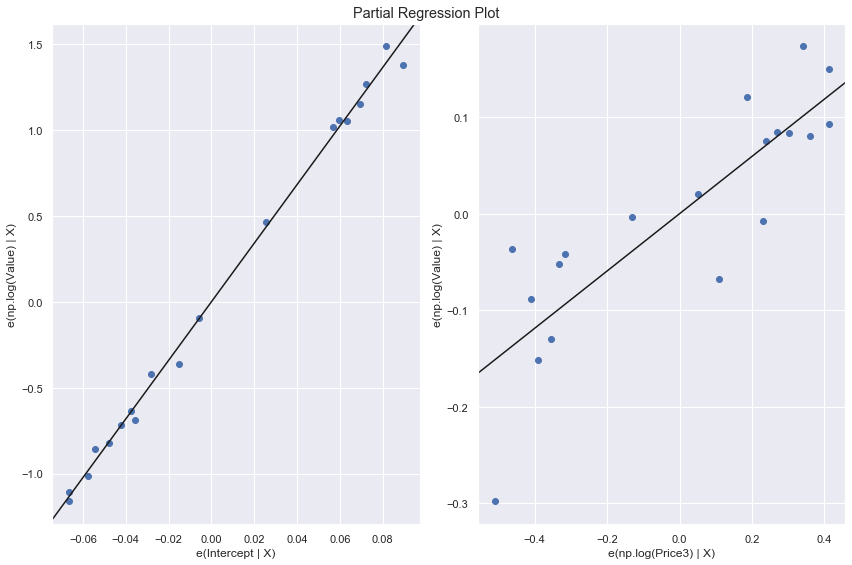

In [58]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(ols_price, fig=fig)

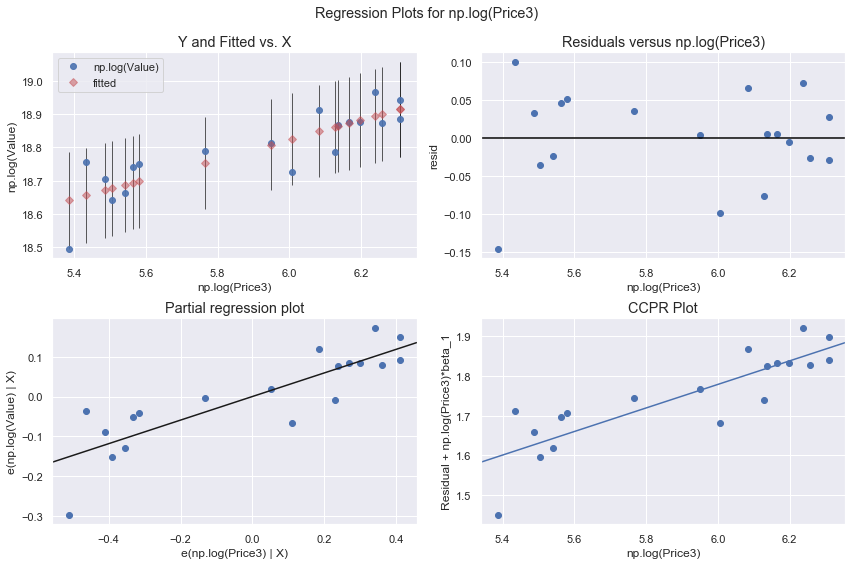

In [327]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ols_price, 'np.log(Price3)', fig=fig)

In [329]:
df['Year'] = pd.to_datetime(df['Year'], format="%Y")
endog = np.log(df['Value'])
exog = sm.add_constant(np.log(df['Price3']))
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                   19
Model:                    RecursiveLS   Log Likelihood                  19.116
Date:                Wed, 01 Jul 2020   R-squared:                       0.726
Time:                        01:34:55   AIC                            -34.231
Sample:                             0   BIC                            -32.342
                                 - 19   HQIC                           -33.911
Covariance Type:            nonrobust   Scale                            0.004
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0451      0.261     65.377      0.000      16.534      17.556
Price3         0.2964      0.044      6.715      0.000       0.210       0.383
Ljung-Box (Q):                         nan   Jarque-

/Users/neelbhandari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


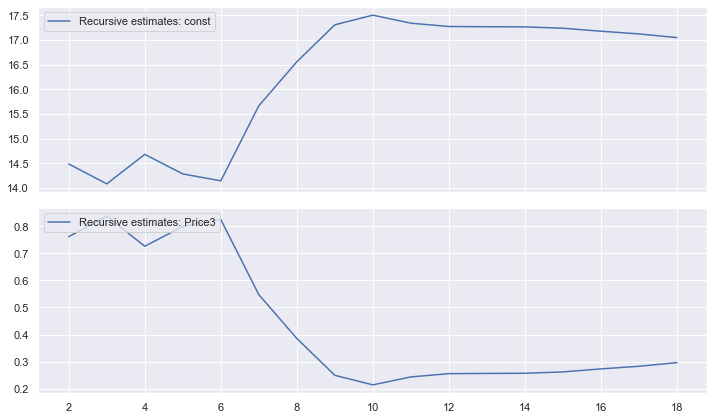

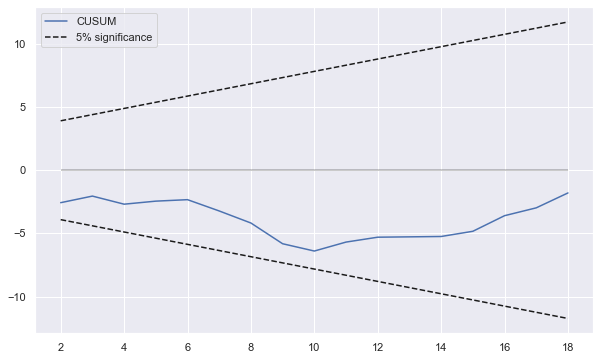

In [330]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));
fig = res.plot_cusum(figsize=(10,6));